In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import OrderedDict
import pandas as pd
import re
%matplotlib inline

In [2]:
def build_graphs(dims):
    colors = cm.rainbow(np.linspace(0, 1, len(dims)))
    for dim, c in zip(dims, colors):
        df = pd.read_csv("results/size_200/{0}/{0}.csv".format(dim))
        
        plt.figure(figsize=(20, 20), num=1)
        plt.clf()
        plt.title("TSP-complexity - entropy")
        plt.xlabel("entropy")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['entropy_k'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], label='')
        plt.legend(loc='best')
        plt.savefig("results/size_200/{0}/ce_{0}.png".format(dim))
        
        plt.figure(figsize=(20, 20), num=2)
        plt.clf()
        plt.title("TSP-complexity - derivative")
        plt.xlabel("derivative")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['derivative_k'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['max_dHk'], df['zcomplexity'], 'co')
        plt.legend(loc='best')
        plt.savefig("results/size_200/{0}/cd_{0}.png".format(dim))
        
        plt.figure(figsize=(20, 20), num=3)
        plt.clf()
        plt.title("TSP-complexity - integral majoranta")
        plt.xlabel("integral majoranta distance")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['majoranta_integral'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], 'c>')
        plt.legend(loc='best')
        plt.savefig("results/size_200/{0}/cim_{0}.png".format(dim))
        
        plt.figure(figsize=(20, 20), num=4)
        plt.clf()
        plt.title("TSP-complexity - chebishev majoranta")
        plt.xlabel("chebishev majoranta distance")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['majoranta_chebishev'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], 'c>')
        plt.legend(loc='best')
        plt.savefig("results/size_200/{0}/cchm_{0}.png".format(dim))
        
        plt.figure(figsize=(20, 20), num=5)
        plt.title("Total: TSP-complexity - entropy")
        plt.xlabel("entropy")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['entropy_k'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], 'c>')
        plt.legend(loc='best')
        
        plt.figure(figsize=(20, 20), num=6)
        plt.title("Total: TSP-complexity - derivative")
        plt.xlabel("derivative")
        plt.ylabel("tsp-complexity")
        plt.scatter(df['derivative_k'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['max_dHk'], df['zcomplexity'])
        plt.legend(loc='best')
        
        plt.figure(figsize=(20, 20), num=7)
        plt.title("Total: TSP-complexity - integral majoranta")
        plt.xlabel("integral majoranta distance")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['majoranta_integral'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], 'c>')
        plt.legend(loc='best')
        
        plt.figure(figsize=(20, 20), num=8)
        plt.title("Total: TSP-complexity - chebishev majoranta")
        plt.xlabel("chebishev majoranta distance")
        plt.ylabel("TSP-complexity")
        plt.scatter(df['majoranta_chebishev'], df['tsp_complexity'], c=c, label="{0} x {1}".format(dim, dim))
        #plt.plot(df['entropy'], df['zcomplexity'], 'c>')
        plt.legend(loc='best')
        
    plt.figure(num=5)
    plt.savefig("results/size_200/totalce.png")
    plt.figure(num=6)
    plt.savefig("results/size_200/totalcd.png")
    plt.figure(num=7)
    plt.savefig("results/size_200/totalcim.png")
    plt.figure(num=8)
    plt.savefig("results/size_200/totalcchm.png")

In [ ]:
dims = [20, 25, 30, 35, 40, 45, 49]
build_graphs(dims)

In [8]:
dims = [20, 25, 30, 35, 40, 45, 49]
df = pd.DataFrame()
for dim in dims:
    _df = pd.read_csv("results/size_200/{0}/{0}.csv".format(dim), index_col='Unnamed: 0')
    df = df.append(_df, ignore_index=True)
    
df.corr()

tsp_complexity  dimension    peak_k  entropy_k  \
tsp_complexity             1.000000   0.386947  0.331033  -0.173847   
dimension                  0.386947   1.000000  0.955031  -0.486190   
peak_k                     0.331033   0.955031  1.000000  -0.661711   
entropy_k                 -0.173847  -0.486190 -0.661711   1.000000   
derivative_k              -0.315042  -0.951117 -0.953847   0.558350   
majoranta_integral         0.349446   0.912531  0.853015  -0.486707   
majoranta_chebishev        0.353305   0.818700  0.731209  -0.442432   

                     derivative_k  majoranta_integral  majoranta_chebishev  
tsp_complexity          -0.315042            0.349446             0.353305  
dimension               -0.951117            0.912531             0.818700  
peak_k                  -0.953847            0.853015             0.731209  
entropy_k                0.558350           -0.486707            -0.442432  
derivative_k             1.000000           -0.923876            -0.814419  
majoranta_integral      -0.923876            1.000000             0.965992  
majoranta_chebishev     -0.814419            0.965992             1.000000

In [4]:
def build_hist(dims):
    df = pd.DataFrame()
    for dim in dims:
        _df = pd.read_csv("results/size_200/{0}/{0}.csv".format(dim), index_col='Unnamed: 0')
        df = df.append(_df, ignore_index=True)
    
    plt.figure(figsize=(20, 40))
    plt.hist(df['tsp_complexity'])
    plt.savefig("results/size_200/distribution.png")
    plt.show()

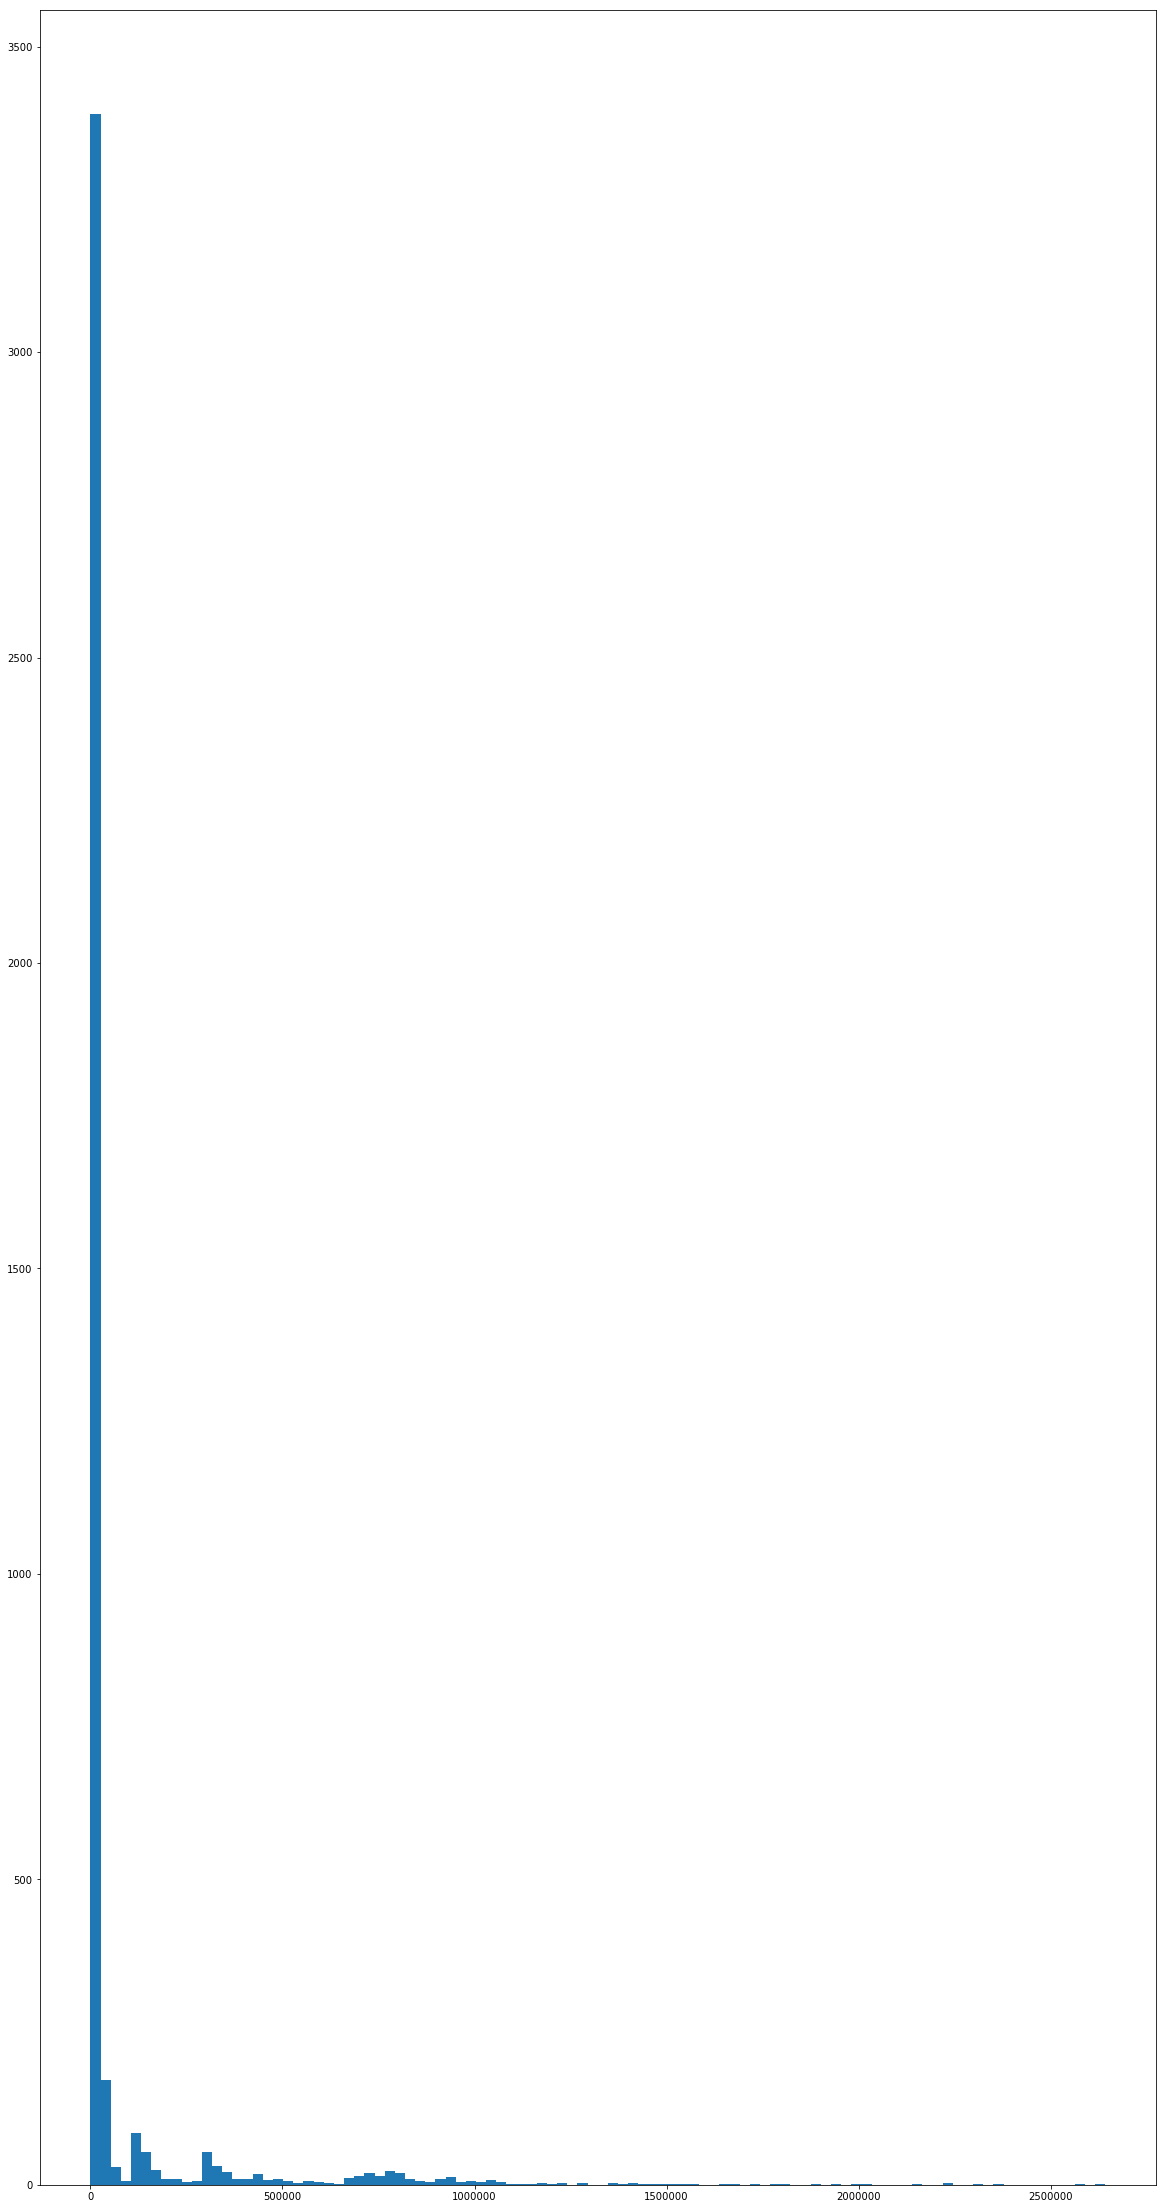

In [5]:
dims = [20, 25, 30, 35, 40, 45, 49]
build_hist(dims)

In [18]:
def concatenate_results(dims):
    df = pd.DataFrame()
    for dim in dims:
        _df = pd.read_csv("results/size_200/{0}/{0}.csv".format(dim), index_col='Unnamed: 0')
        df = df.append(_df, ignore_index=True)
    df.to_csv("results/size_200/total.csv")

In [19]:
concatenate_results(dims)